In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape



In [2]:
merged_df = pd.read_csv('merged_df.csv')



merged_df['Data'] = pd.to_datetime(merged_df['Data_x'])
merged_df['hour'] = merged_df['Data'].dt.hour.astype(str)
merged_df['day_of_week'] = merged_df['Data'].dt.dayofweek.astype(str)
merged_df['week_of_year'] = merged_df['Data'].dt.isocalendar().week.astype(str)
merged_df['previous_day_value'] = merged_df['value'].shift(24)

# Split the data into train and test sets
train_size = int(len(merged_df) * 0.8)
train = merged_df[:train_size]
test = merged_df[train_size:]


In [3]:
series = pd.Series(merged_df["value"], index=merged_df.index)

series.index = pd.date_range(start=series.index[0], periods=len(series), freq='H')
decompose_result = seasonal_decompose(series, model='additive')

C:\Users\micha\AppData\Local\Temp\ipykernel_21980\1268248414.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index = pd.date_range(start=series.index[0], periods=len(series), freq='H')


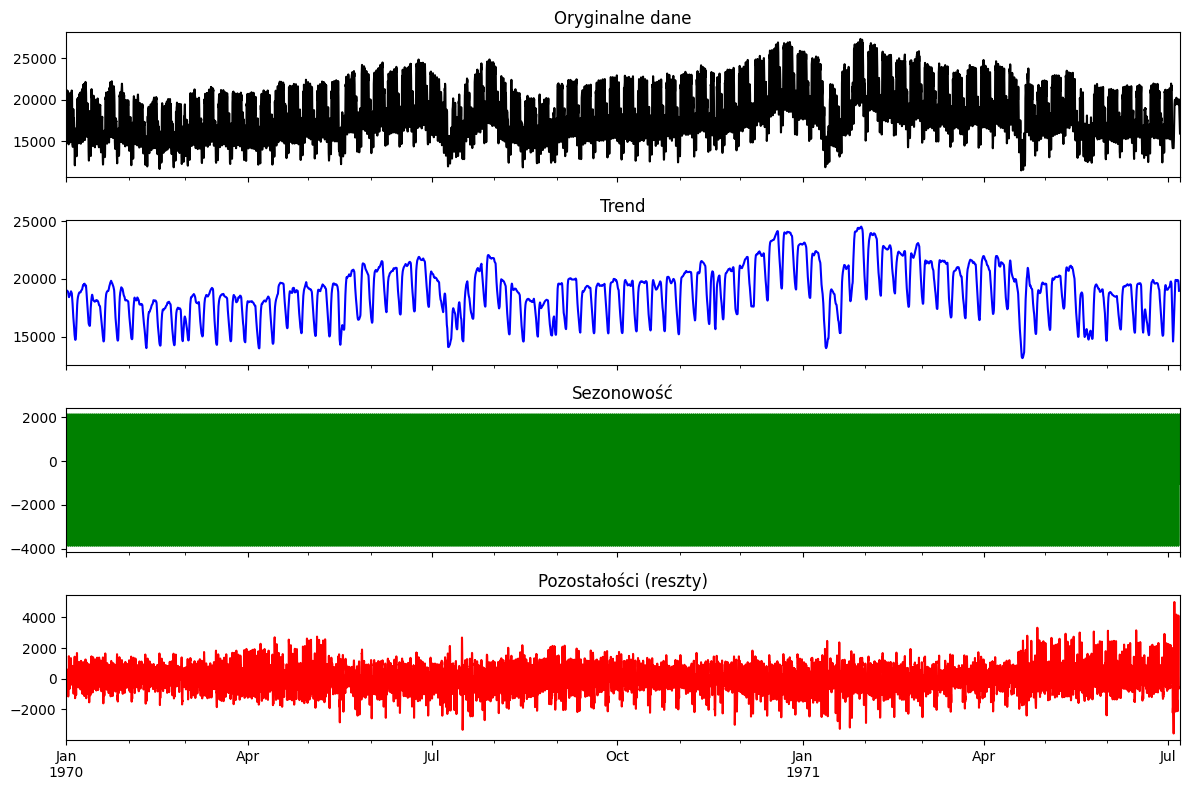

In [4]:
# Wykres wyników dekompozycji
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
series.plot(ax=axes[0], title='Oryginalne dane', color='black')
decompose_result.trend.plot(ax=axes[1], title='Trend', color='blue')
decompose_result.seasonal.plot(ax=axes[2], title='Sezonowość', color='green')
decompose_result.resid.plot(ax=axes[3], title='Pozostałości (reszty)', color='red')
plt.tight_layout()
plt.show()

### Prediction

In [5]:
df_train = pd.read_csv('train_df.csv')
df_test = pd.read_csv('test_df.csv')

m = 12
alpha = 1/(2*m)

In [6]:
df_train.set_index('Data', inplace=True)
df_test.set_index('Data', inplace=True)


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling t

MAPE: 0.17
MAE: 2779.60
RMSE: 12030246.23


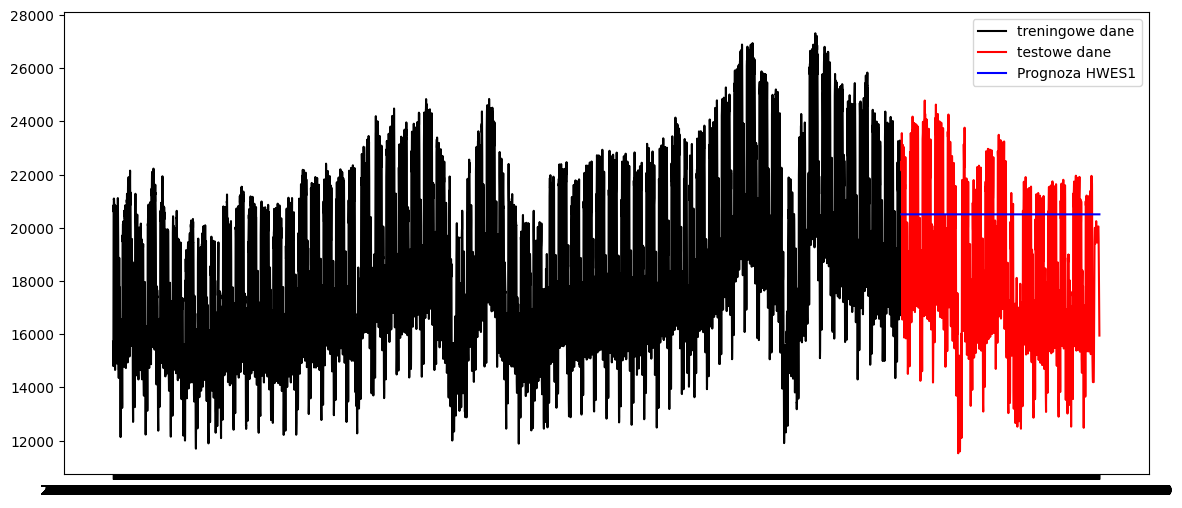

In [7]:

model = SimpleExpSmoothing(df_train["value"])
fit = model.fit(smoothing_level=alpha,optimized=False,use_brute=True)
df_train["HWES1"] = fit.fittedvalues



forecast = fit.forecast(len(df_test))
df_test["forecast"] = forecast.values
mape_value = mape(df_test["value"], df_test["forecast"])
mae_value = mae(df_test["value"], df_test["forecast"])
rmse_value = rmse(df_test["value"], df_test["forecast"])


plt.figure(figsize=(14, 6))
plt.plot(df_train["value"], label='treningowe dane', color='black')
plt.plot(df_test["value"], label='testowe dane', color='red')
plt.plot(df_test["forecast"], label='Prognoza HWES1', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


In [9]:
df_test["forecast"]

Data
2024-02-28 13:00:00    22410.668546
2024-02-28 14:00:00    22027.516029
2024-02-28 15:00:00    22205.717109
2024-02-28 16:00:00    22572.343530
2024-02-28 17:00:00    22459.230671
                           ...     
2024-06-17 19:00:00    21459.513706
2024-06-17 20:00:00    21516.891426
2024-06-17 21:00:00    21007.790306
2024-06-17 22:00:00    19633.792958
2024-06-17 23:00:00    17828.640823
Name: forecast, Length: 2650, dtype: float64

In [10]:
df_test["value"]

Data
2024-02-28 13:00:00    22478.0
2024-02-28 14:00:00    22149.0
2024-02-28 15:00:00    22184.0
2024-02-28 16:00:00    22263.0
2024-02-28 17:00:00    23557.0
                        ...   
2024-06-17 19:00:00    17250.0
2024-06-17 20:00:00    16950.0
2024-06-17 21:00:00    16600.0
2024-06-17 22:00:00    16250.0
2024-06-17 23:00:00    15950.0
Name: value, Length: 2650, dtype: float64

c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred

MAPE: 0.19
MAE: 3586.37
RMSE: 18808440.47


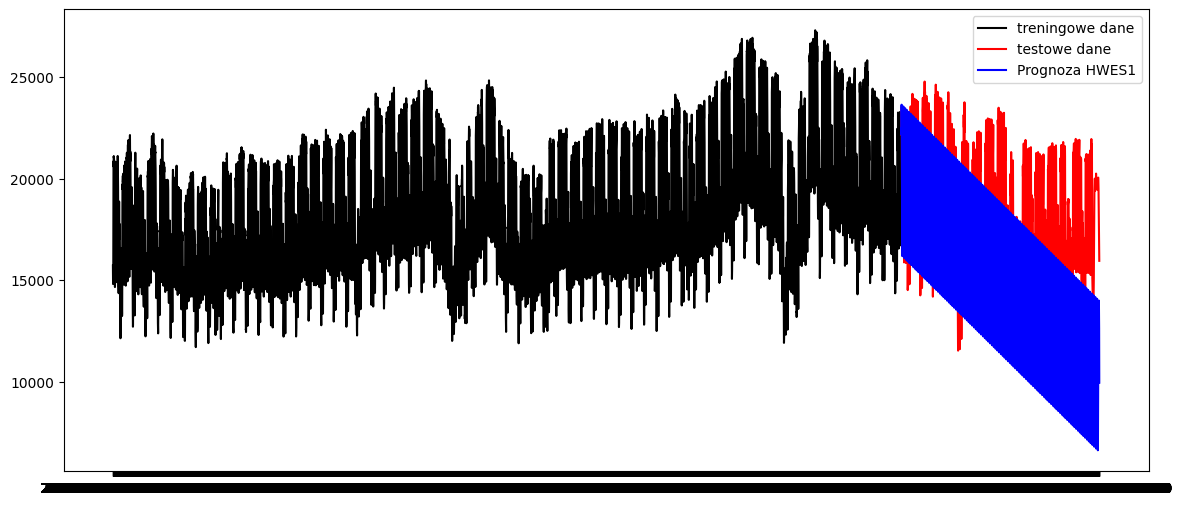

In [13]:

model = ExponentialSmoothing(df_train["value"],trend='add', seasonal='add', seasonal_periods=24*7)
fit = model.fit()
df_train["HWES1"] = fit.fittedvalues



forecast = fit.forecast(len(df_test))
df_test["forecast"] = forecast.values
mape_value = mape(df_test["value"], df_test["forecast"])
mae_value = mae(df_test["value"], df_test["forecast"])
rmse_value = rmse(df_test["value"], df_test["forecast"])


plt.figure(figsize=(14, 6))
plt.plot(df_train["value"], label='treningowe dane', color='black')
plt.plot(df_test["value"], label='testowe dane', color='red')
plt.plot(df_test["forecast"], label='Prognoza HWES1', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
